In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('data.csv') #import Spotify data as dataframe
df['rank'] = range(len(df))
list(df) #get a list of headers

['id',
 'name',
 'artists',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'rank']

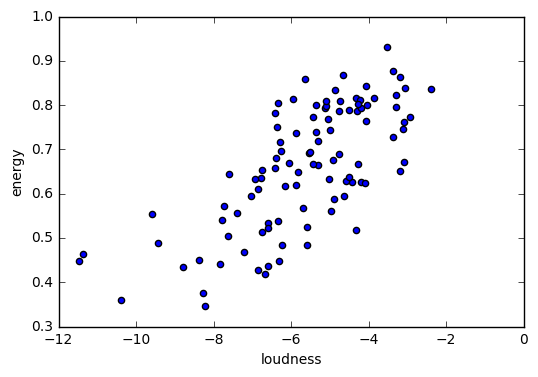

In [15]:
#danceability vs. energy
df.plot(kind='scatter', x='loudness', y='energy')
plt.show()

In [16]:
len(df.artists.unique())

78

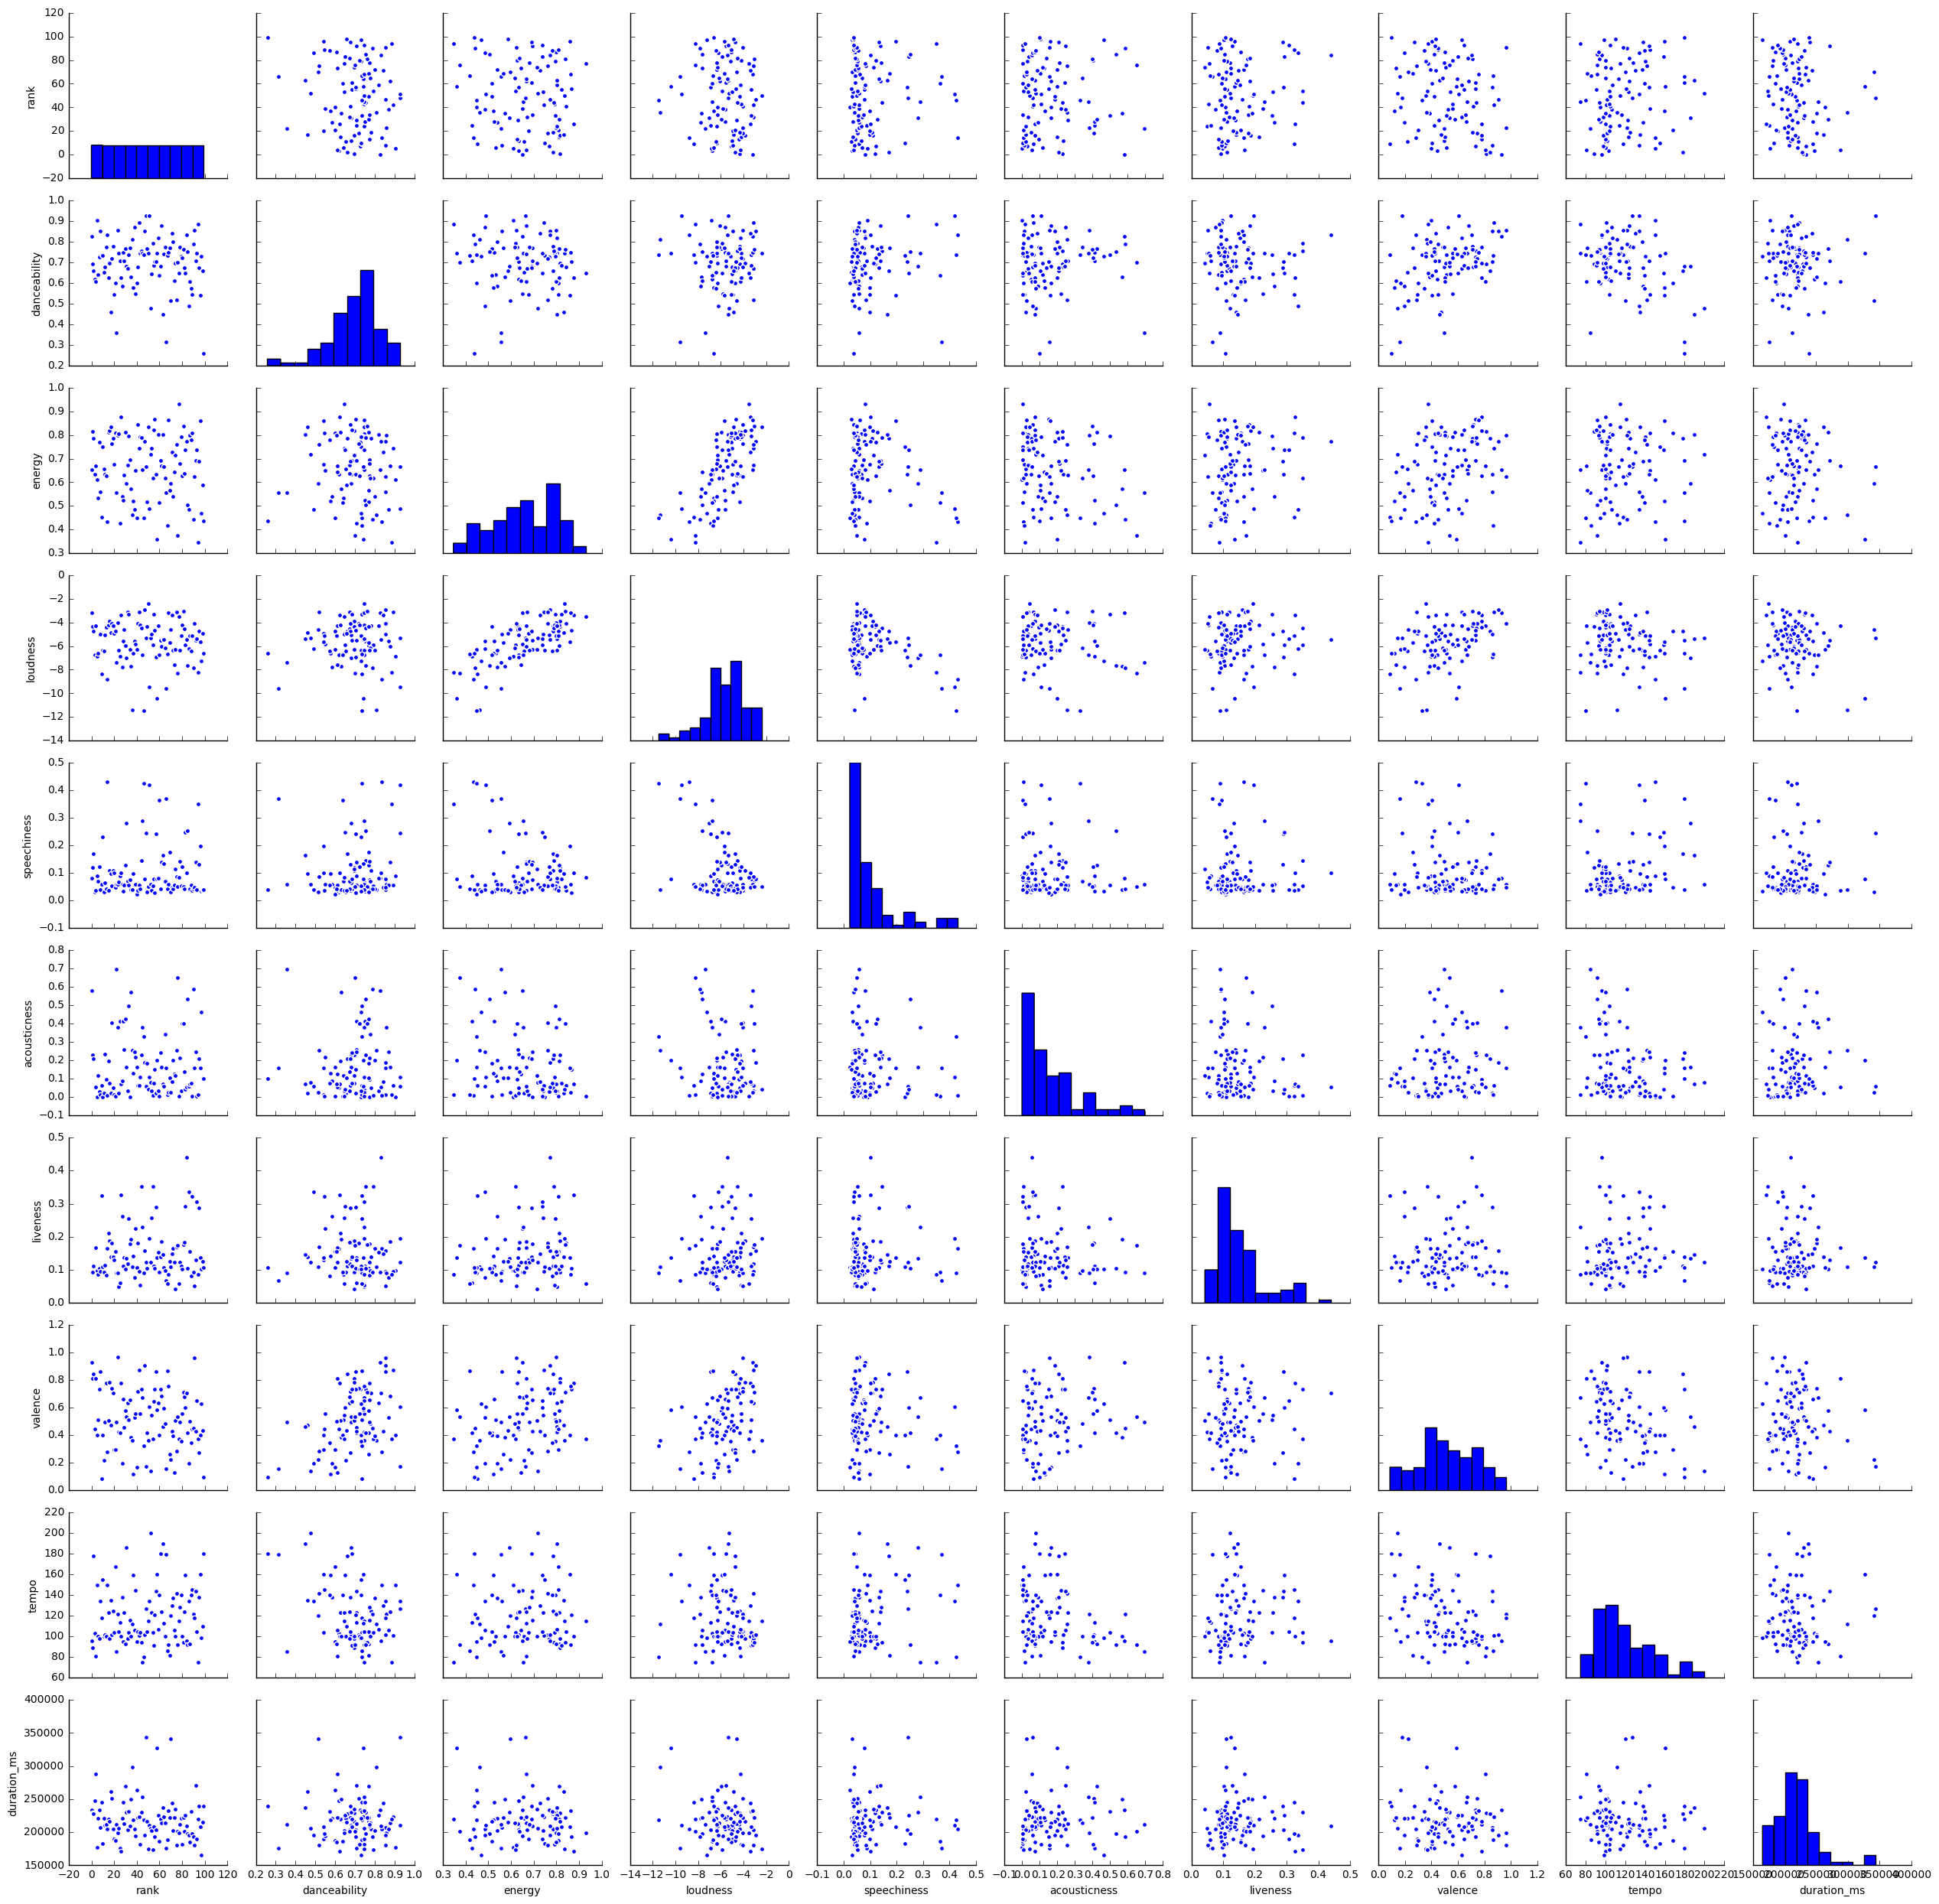

In [17]:
#truncate to quantitative data
df_truncated = df[['rank',
                   'danceability',
                   'energy',
                   'loudness',
                   'speechiness',
                   'acousticness',
                   'liveness',
                   'valence',
                   'tempo',
                   'duration_ms']]
g = sns.pairplot(df_truncated)
plt.show()

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(df_truncated)
pca.components_

array([[ -1.01023629e-04,   2.29913362e-08,  -3.81431726e-07,
         -7.85814118e-06,  -3.35286541e-08,   1.94700799e-07,
         -1.12416693e-07,  -7.93290870e-07,  -1.88902397e-05,
          9.99999995e-01]])

In [19]:
list(df_truncated) #get a list of headers

['rank',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']